# Homework

In [88]:
#Handy imports from class

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal

df = pd.read_csv('temperatures/temperature.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


### 1. Write a function that efficiently converts every column to a different temperature scale

In [89]:
def convert_temp(t):
    return t - 273.15

In [90]:
df_temp = df.loc[:, 'Vancouver'::].apply(convert_temp)
#df_temp = df.apply(convert_temp)
print(df_temp.head())

   Vancouver  Portland  San Francisco   Seattle  Los Angeles  San Diego  \
0        NaN       NaN            NaN       NaN          NaN        NaN   
1  11.480000  8.930000      16.330000  8.650000    18.720000  18.380000   
2  11.479041  8.933252      16.324993  8.647217    18.718186  18.383501   
3  11.476998  8.941866      16.310618  8.639833    18.712844  18.393355   
4  11.474955  8.950481      16.296243  8.632449    18.707503  18.403209   

   Las Vegas    Phoenix  Albuquerque     Denver  ...  Philadelphia   New York  \
0        NaN        NaN          NaN        NaN  ...           NaN        NaN   
1  20.260000  23.450000    11.970000  11.460000  ...     12.480000  15.070000   
2  20.253141  23.458509    12.004558  11.457306  ...     12.513208  15.097676   
3  20.242177  23.481487    12.083952  11.449918  ...     12.606824  15.176940   
4  20.231213  23.504466    12.163345  11.442530  ...     12.700440  15.256203   

    Montreal     Boston  Beersheba  Tel Aviv District      Eil

### 2. Write a function that efficiently fills in missing values in every column, except for trailing NANs.  

That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end

In [86]:
#last_nan = df.last_valid_index()
#df.index[last_nan]

In [82]:
#def missing_val(df):
    #return df.interpolate(method ='linear', limit_direction ='forward')
    
def missing_val(df):
    for row, column in df.iterrows():
        x = df['datetime']
        knowns = df.loc[~df[column].isnull(), ['datetime', column]]
        xp = knowns['datetime']
        fp = np.array(kknows[column])
        return pd.DataFrame({'datetime': x, column: np.interp(x,xp,fp)})
        

#def missing_val(df):
    #for row, column in df.iterrows():
    
        #if df[column] == 'NaN':
            #x = df['datetime']
            #knowns = df.loc[~df[column].isnull(), ['datetime', column]]
            #xp = knowns['datetime']
            #fp = np.array(knowns[column])

    #return pd.DataFrame({'datetime':x, column: np.interp(x, xp, fp)})



#df.interpolate(method ='linear', limit_direction ='forward')

#know where index of knowns ends (gives datetime)
#save timestamp
#took timestamp and looked for it in Series 'x': x[x == xEndTime].index[0]
#x = x[:xEndIndex +1] 
#interpolates to last datapoint

In [87]:
missing_val(df).head()

ValueError: Cannot mask with non-boolean array containing NA / NaN values

### 3. Find cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average

In [92]:
df['month'] = pd.DatetimeIndex(df['datetime']).month

weather_info = df.groupby('month')
weather_avg = weather_info.mean()
weather_avg

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
month,,,,,,,,,,,,,,,,,,,,,
1,276.585788,276.733184,283.456387,277.589315,285.560479,285.444258,280.309599,284.202732,273.918558,272.339114,...,272.783716,272.605444,265.618906,272.020712,282.826390,286.281093,286.083201,287.884705,286.574599,284.734828
2,277.936693,279.159428,284.987995,279.115783,286.731205,286.558241,283.822674,287.371805,277.755794,273.901375,...,273.096615,272.579363,264.835504,271.969000,284.218370,287.127349,287.510675,288.883167,287.665501,286.425471
3,280.155816,281.697859,286.431086,281.074323,288.637277,288.117418,288.734367,291.825838,282.516877,278.155620,...,277.268831,276.761908,269.776317,274.956681,287.616751,290.253544,291.799513,290.719916,290.001102,289.436384
4,282.808979,283.817127,287.459154,283.333814,289.627184,288.945891,291.587181,294.566349,285.652280,280.987653,...,284.988592,284.062340,278.840933,281.902631,290.991550,292.625873,295.259726,292.751157,292.128034,292.049545
5,286.871250,287.715237,288.991685,287.091708,290.994683,290.223795,296.065887,298.619910,289.369486,285.278960,...,290.145285,289.717402,287.664433,287.418257,294.637096,296.012348,299.958820,296.381854,294.808142,295.616104
6,289.378408,290.503580,291.006091,289.586508,294.021611,292.496028,303.975529,305.532617,296.687798,292.923068,...,295.119453,294.622517,291.273033,292.173164,296.770367,298.934896,303.068025,299.337915,297.684001,297.878246
7,292.126039,293.474855,292.621702,292.049279,296.425532,294.987232,306.268570,307.239266,296.530025,295.286624,...,297.633993,297.821355,294.300587,295.948143,298.049009,300.841867,305.553981,301.591589,300.141664,299.618820
8,292.255956,293.933623,292.010339,292.336526,296.374908,295.187755,303.727005,305.509030,294.093886,293.410002,...,295.817694,296.389140,293.049933,294.717423,298.723878,301.970355,305.249268,302.340679,300.792314,300.794784
9,288.427139,289.985510,292.117253,288.836096,295.893929,294.826691,299.136552,302.101604,291.830166,290.323915,...,292.864279,293.287326,290.046735,291.748153,296.991327,300.830170,302.649690,301.639179,299.719534,299.252741


### 4. For the two cities you found in for problem 4 (there are many possible answers), clean up the data via aggregation or rolling averages and plot a clear visual

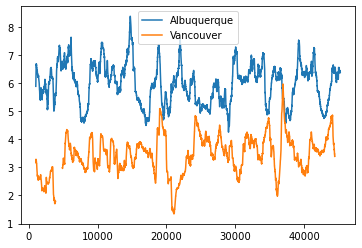

In [99]:
plt.plot(df['Albuquerque'].rolling(1000).std(), label = "Albuquerque")
plt.plot(df['Vancouver'].rolling(1000).std(), label = "Vancouver")
plt.legend()
plt.show()